In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("heart.csv")

print("Basic information about the dataset:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

print("\nData types:")
print(df.dtypes)





Basic information about the dataset:
Rows: 1025
Columns: 14

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [4]:
print("\n Basic statistics:")
print(df.describe())

print("\n First five rows:")
df.head()


 Basic statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Correlations:


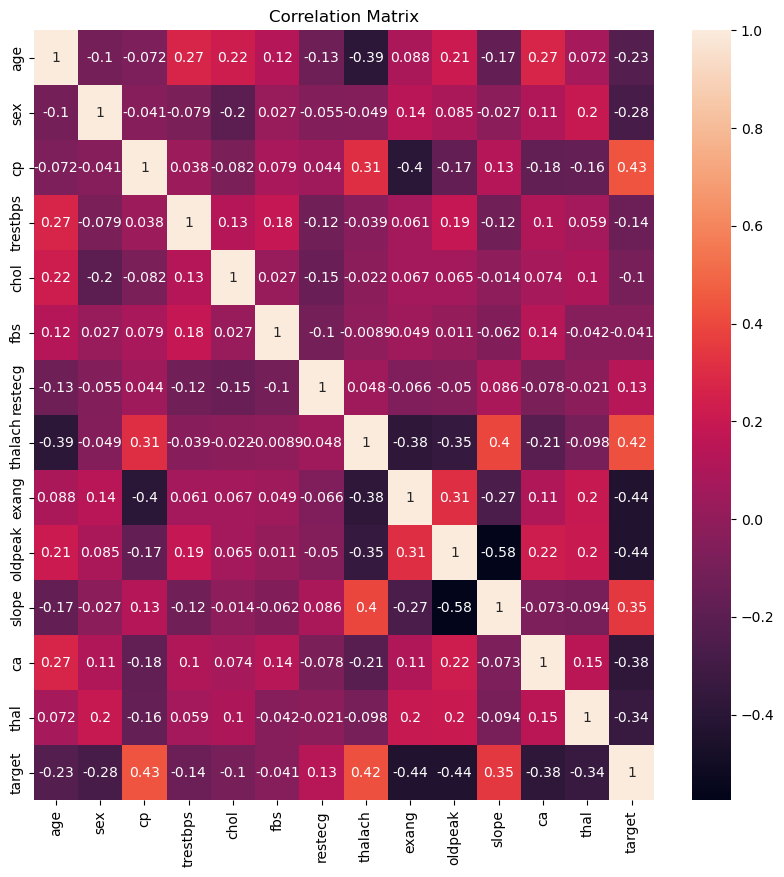

In [5]:
print("\nCorrelations:")
plt.figure(figsize=(10, 10))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True)
plt.show()




In [6]:
print("\nMissing values:")
print(df.isnull().sum())

print("\nUnique values:")
df.nunique()


Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Unique values:


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

duplicate_count = df.duplicated().sum()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(f"\nNumber of duplicate rows in the data: {duplicate_count}")
if duplicate_count > 0:
    print("List of duplicate rows:")
    duplicate_rows = df[df.duplicated()].sort_values(by=df.columns.tolist())
    print(duplicate_rows.head(20))



Number of duplicate rows in the data: 723
List of duplicate rows:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
64    29    1   1       130   204    0        0      202      0      0.0      2   0     2       1
118   29    1   1       130   204    0        0      202      0      0.0      2   0     2       1
668   29    1   1       130   204    0        0      202      0      0.0      2   0     2       1
15    34    0   1       118   210    0        1      192      0      0.7      2   0     2       1
779   34    0   1       118   210    0        1      192      0      0.7      2   0     2       1
201   34    1   3       118   182    0        0      174      0      0.0      2   0     2       1
572   34    1   3       118   182    0        0      174      0      0.0      2   0     2       1
501   35    0   0       138   183    0        1      182      0      1.4      2   0     2       1
841   35    0   0       138   183    0        1    